In [1]:
# setup imports
import sys, os

path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)
    
import warnings
warnings.filterwarnings('ignore')

# What are opinions, exactly?

In [2]:
from IPython.display import YouTubeVideo

from IPython.core.display import HTML

import ipywidgets as widgets


HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
""");

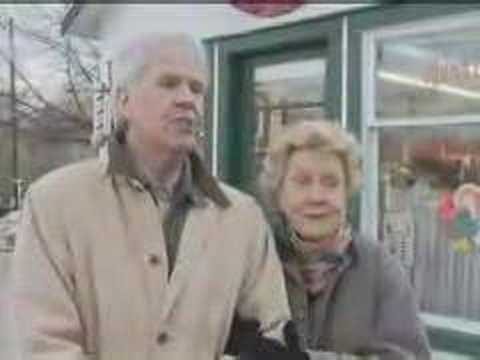

In [3]:
YouTubeVideo('K4-vEwD_7Hk', width=500, height=300)

### Opinions are encoded as vectors

with one entry for each opinion dimension.

In [4]:
from vis.vis import sample_initial_opinion_limits


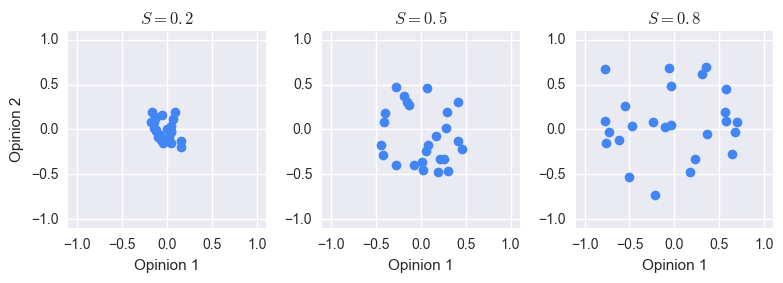

In [5]:
sample_initial_opinion_limits()

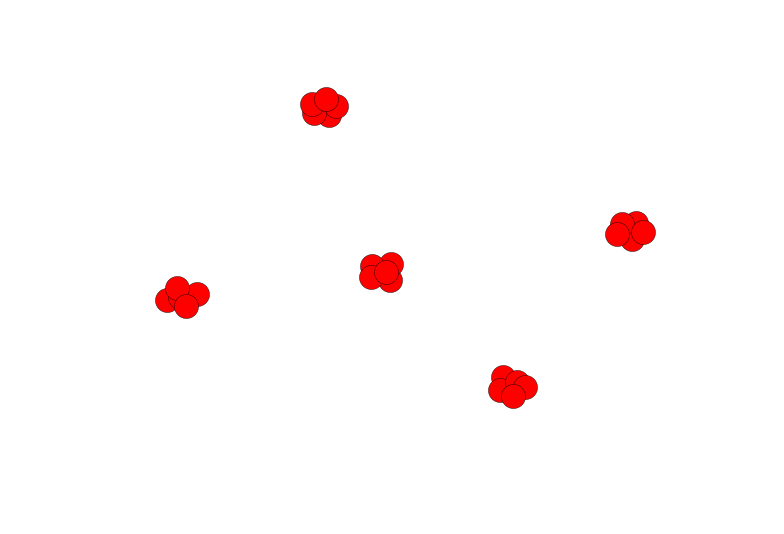

In [6]:
from macy.macy import Network, caves
import networkx as nx

n_0 = Network(caves(5, 5))

fig, ax = plt.subplots()
nx.draw(n_0.graph, ax=ax)

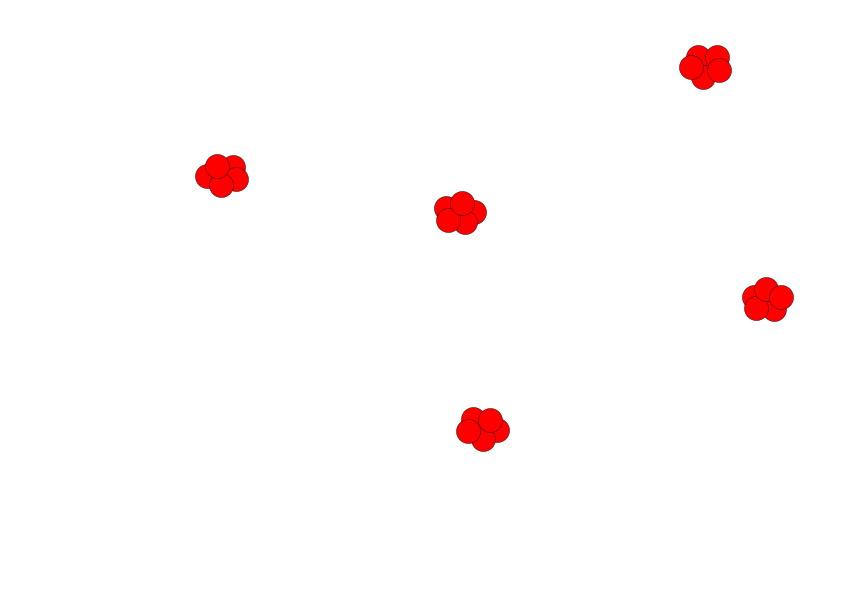

In [7]:
from copy import deepcopy
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import ipywidgets as widgets


    

## Agents' neighbors determined by the randomized caveman network

In [32]:
n_0 = Network(caves(5, 5))

def vis_interactive_random_rewirings(add_cxn_prob):
    new_network = deepcopy(n_0)
    new_network.add_random_connections(add_cxn_prob)
    nx.draw(new_network.graph)

interact(vis_interactive_random_rewirings, add_cxn_prob=(0, .2, .01))

interactive(children=(FloatSlider(value=0.1, description=u'add_cxn_prob', max=0.2, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.vis_interactive_random_rewirings>

In [21]:
from macy.macy import get_opinions_xy
import networkx as nx

def visualize_polarization_timeseries(time_idx, history, graph):
    
    fig, ax = plt.subplots(figsize=(5, 5)) 
        
    now_ops = history[time_idx]['opinions']
    
    # extract x and y vectors for locations of points in scatterplot
    x, y = get_opinions_xy(now_ops)
        
    ax.plot(x, y, 'o', ms=10, alpha=0.8, zorder=1)
    
    node_pos = dict((agent, op) for agent, op in zip(sorted(graph.nodes()), now_ops))
    nx.draw_networkx_edges(graph, node_pos, ax=ax, zorder=4)
    if time_idx > 0:
        prev_ops = history[time_idx - 1]['opinions']
        diff = [now_ops[i] - prev_ops[i] for i in range(len(now_ops))]
        
        dx, dy = get_opinions_xy(diff)

        # plot vector "force" on each agent's opinions
        ax.quiver(x, y, [diff[i][0] for i in range(len(diff))], [diff[i][1] for i in range(len(diff))], 
                  angles='xy', scale_units='xy', width=.005, scale=0.5, zorder=3, alpha=0.8)

    plt.xlim(-2.1, 2.1)
    plt.ylim(-2.1, 2.1)
#     plt.title('Polarization: {:.2f}\nIteration: {}'.format(
#                         history[time_idx]['polarization'], time_idx
#                     )
#                 )


In [39]:
from experiments.within_box import BoxedCavesExperiment

e = BoxedCavesExperiment(2, 1, 1.0)
e.setup(percolation_limit=True)
e.iterate(100, noise_level=0)

interactive(visualize_polarization_timeseries, 
            time_idx=widgets.IntSlider(min=0, max=100, step=1, value=0),
            history=fixed(e.history),
            graph=fixed(e.network.graph))

interactive(children=(IntSlider(value=0, description=u'time_idx'), Output()), _dom_classes=('widget-interact',))

### Recurrence relation for the opinion dynamics

$$
s_ik[t+1] = s_ik[t] + \Delta s_{ik}[t](1 - \text{sgn}(s_{ik}[t])s_ik[t])
$$

where 

$$
\Delta s_{ik}[t] = \frac{1}{n_i[t]}\sum_{i\neq j} w_ij[t](s_{jk}[t] - s_{ik}[t])
$$

and 

$$
w_{ij}[t] = 1 - \frac{\sum_k | s_{jk}[t] - s_{ik}[t] |}{K}
$$

## Now some simulations with four caves and three agents per cave

In [44]:
e = BoxedCavesExperiment(4, 3, 0.4)
e.setup(percolation_limit=True)
e.iterate(100, noise_level=0.16)

interactive(visualize_polarization_timeseries,
            time_idx=widgets.IntSlider(min=0, max=99, step=1, value=0),
            history=fixed(e.history),
            graph=fixed(e.network.graph))

interactive(children=(IntSlider(value=0, description=u'time_idx', max=99), Output()), _dom_classes=('widget-interact',))

In [16]:
e = BoxedCavesExperiment(5, 4, 1.0)
e.setup(percolation_limit=True)
e.iterate(100, noise_level=0.10)

interactive(visualize_polarization_timeseries,
            time_idx=widgets.IntSlider(min=0, max=100, step=1, value=0),
            history=fixed(e.history),
            graph=fixed(e.network.graph))

interactive(children=(IntSlider(value=0, description=u'time_idx'), Output()), _dom_classes=('widget-interact',))